- 데이터셋 : scikit-learn 의 load_diabetes 활용
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : KNNRegressor

In [495]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [496]:
# 반환값 : DataFrame 형대로 반환
datadict=load_diabetes(as_frame=True,scaled=False)
datadict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [497]:
dataDF=datadict['data']
dataDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [498]:
# target 추출
target=datadict['target']

In [499]:
# 상관도 확인
for col in dataDF:
    print(f' {col}과 target의 상관도 {np.corrcoef(dataDF[col],target)[0,1]}')

 age과 target의 상관도 0.18788875071891978
 sex과 target의 상관도 0.043061998451605334
 bmi과 target의 상관도 0.5864501344746885
 bp과 target의 상관도 0.4414817585625713
 s1과 target의 상관도 0.2120224810145507
 s2과 target의 상관도 0.17405358696874262
 s3과 target의 상관도 -0.3947892506709184
 s4과 target의 상관도 0.43045288474477267
 s5과 target의 상관도 0.5658825924427441
 s6과 target의 상관도 0.3824834842485811


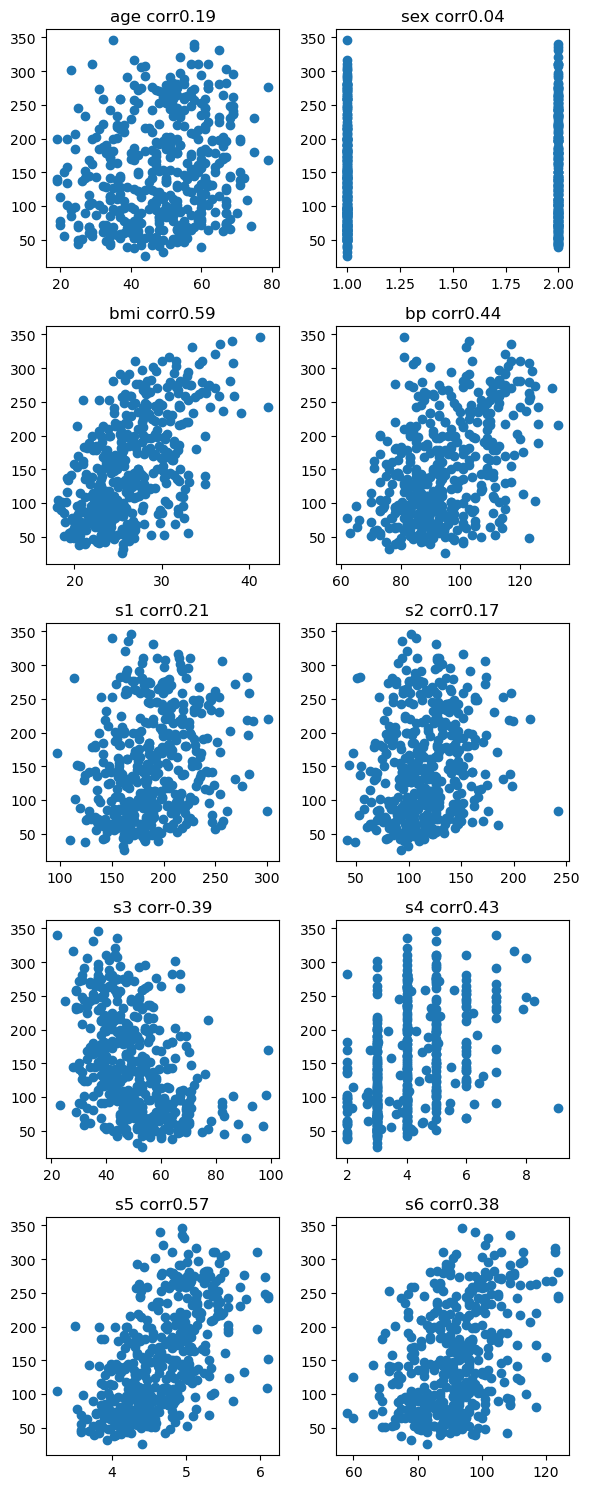

In [500]:
# 연관성 시각화 확인
fig=plt.figure(figsize=(6,15))
ax=fig.subplots(5,2)
for i in range(10):
    x=i//2
    y=i%2
    ax[x,y].scatter(dataDF[dataDF.columns[i]],target)
    ax[x,y].set_title(f'{dataDF.columns[i]} corr{round(np.corrcoef(dataDF[dataDF.columns[i]],target)[0,1],2)}')
plt.tight_layout()
plt.show()

In [501]:
feature=dataDF[['bmi','s5']]
feature.shape

(442, 2)

In [502]:
# 데이터셋 학습용 테스트용 분리
from sklearn.model_selection import train_test_split 

In [503]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((331, 2), (111, 2), (331,), (111,))

In [504]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

In [505]:
scaler=MinMaxScaler()

In [506]:
scaler.fit(X_train)

MinMaxScaler()

In [507]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [508]:
# 모델 학습
from sklearn.neighbors import KNeighborsRegressor

In [509]:
model=KNeighborsRegressor()

In [510]:
model.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [511]:
# 최적 neighbor 값 찾기
scores={}
for i in range(1,len(X_test)+1):
    model.n_neighbors=i
    score=model.score(X_test_scaled,y_test)
    scores[i]=score

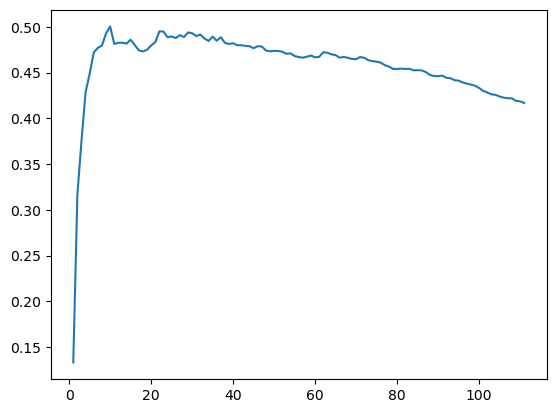

In [512]:
plt.plot(scores.keys(),scores.values())
plt.show()

In [513]:
best_K=sorted(scores.items(),key=lambda x:x[1],reverse=True)[0][0]
model.n_neighbors=best_K

In [514]:
# 점수 확인
model.score(X_test_scaled,y_test)

0.5002561206843135